In [1]:
import numpy as np
from tesser import util
from tesser import fit

data_dir = '/Users/Zhonghou/Desktop/General/Data/'

struct_df = util.load_struct(data_dir)
induct_df = util.load_induct(data_dir)



In [15]:
var_names = ['alpha', 'gamma', 'tau']
fixed = {'tau': 1}


In [35]:
import importlib
importlib.reload(fb)

<module 'tesser.fit_bayes' from '/Users/Zhonghou/Desktop/General/Preston Lab/tesser_successor/tesser/fit_bayes.py'>

In [36]:
from scipy.stats import uniform
from tesser import fit_bayes as fb

def prior(x):
    within_range = True
    for i in range(x.shape[0]):
        within_range = within_range and 0 <= x[i] and x[i] <= 1
    return int(within_range)
        

samples = fb.bayes_induct(struct_df, induct_df, fixed, var_names, prior, (1, 5), 100, 500)

Status: t > 0
Status: t > 10
Status: t > 20
Status: t > 30
Status: t > 40
Status: t > 50
Status: t > 60
Status: t > 70
Status: t > 80
Status: t > 90
Status: t > 100
Status: t > 110
Status: t > 120
Status: t > 130
Status: t > 140
Status: t > 150
Status: t > 160
Status: t > 170
Status: t > 180
Status: t > 190
Status: t > 200
Status: t > 210
Status: t > 220
Status: t > 230
Status: t > 240
Status: t > 250
Status: t > 260
Status: t > 270
Status: t > 280
Status: t > 290
Status: t > 300
Status: t > 310
Status: t > 320
Status: t > 330
Status: t > 340
Status: t > 350
Status: t > 360
Status: t > 370
Status: t > 380
Status: t > 390
Status: t > 400
Status: t > 410
Status: t > 420
Status: t > 430
Status: t > 440
Status: t > 450
Status: t > 460
Status: t > 470
Status: t > 480
Status: t > 490
Status: t > 500
Status: t > 510
Status: t > 520
Status: t > 530
Status: t > 540
Status: t > 550
Status: t > 560
Status: t > 570
Status: t > 580
Status: t > 590


In [37]:
import pandas as pd
df_samples = pd.DataFrame(samples)
df_samples.to_csv('/Users/Zhonghou/Desktop/General/Preston Lab/tesser_successor/posterior_samples.txt')


(array([642.28574652,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        , 850.49925776,   0.        ,
          0.        , 271.73627738]),
 array([0.9914662 , 0.99203293, 0.99259965, 0.99316638, 0.9937331 ,
        0.99429983, 0.99486656, 0.99543328, 0.99600001, 0.99656673,
        0.99713346]),
 <a list of 10 Patch objects>)

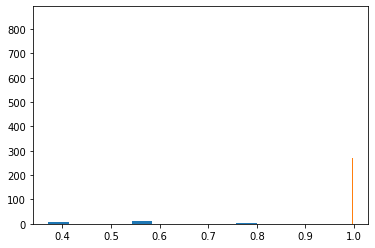

In [43]:
import matplotlib.pyplot as plt
plt.hist(samples[:, 0], density=True)
plt.hist(samples[:, 1], density=True)

In [32]:
df_samples

,Unnamed: 0,0,1
0,0,0.390570,1.145446
1,1,0.390570,1.145446
2,2,0.390570,1.145446
3,3,0.390570,1.145446
4,4,0.390570,1.145446
5,5,0.390570,1.145446
6,6,0.390570,1.145446
7,7,0.390570,1.145446
8,8,0.390570,1.145446
9,9,0.390570,1.145446
